# Fine and Coarse Recognition

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import itertools

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical

### Data initilization

In [2]:
train_dir = r'put your path here'



In [3]:
CLASSES = os.listdir(train_dir)

for _class in CLASSES:
    print('{} {} images'.format(_class, len(os.listdir(os.path.join(train_dir, _class)))))
    

1_Capitol 100 images
1_cemetry 322 images
1_Chijmes 75 images
1_church 54 images
1_Cityhall 100 images
1_CoffeeShop 100 images
1_HDB 75 images
1_law 94 images
1_library 114 images
1_museum 42 images
1_scis 82 images
1_SMUadmin 75 images
1_Underground 75 images
americano 305 images
bak_kwa 550 images
beef_noodles_soup 1231 images
boiled_clams 285 images
boonthi 277 images
braised_pig_skin 683 images
braised_pig_trotter_with_mushroom 265 images
braised_pork_with_black_fungus 290 images
cafe_coffee_with_milk 786 images
chasoba 878 images
chicken_and_mushroom_noodles_soup 263 images
chicken_feet_noodles_soup 263 images
chicken_macaroni_soup 262 images
cooked_jellyfish_with_sesame_seed 200 images
crab_stick 264 images
curry_udon 250 images
dry_chicken_feet_noodles 392 images
dry_duck_noodles 238 images
duck_noodles_soup 288 images
espresso 263 images
fishball 271 images
fish_tofu_cheese_tofu 806 images
fried_fishcake 688 images
fried_spicy_mussels 310 images
fried_vegetable_samosa 288 image

### Training Data Files

In [4]:
train = []

for class_num, _class in enumerate(CLASSES):
    for file in os.listdir(os.path.join(train_dir, _class)):
        train.append(['put your path here/{}/{}'.format(_class, file), class_num, _class])
        
train = pd.DataFrame(train, columns=['file', 'class_num', '_class'])

print('Training Data: ',train.shape)


Training Data:  (27671, 3)


### Lets make order of classes according to requirements provided

In [5]:
# Specified classes and indexes
dic_of_pros_order = {'1_Capitol': 0,

'1_Chijmes': 1,

'1_Cityhall': 2,

'1_CoffeeShop': 3,

'1_HDB': 4,

'1_SMUadmin': 5,

'1_Underground': 6,

'1_cemetry': 7,

'1_church': 8,

'1_law': 9,

'1_library': 10,

'1_museum': 11,

'1_scis': 12,

'americano': 13,

'bak_kwa': 14,

'beef_noodles_soup': 15,

'boiled_clams': 16,

'boonthi': 17,

'braised_pig_skin': 18,

'braised_pig_trotter_with_mushroom': 19,

'braised_pork_with_black_fungus': 20,

'cafe_coffee_with_milk': 21,

'chasoba': 22,

'chicken_and_mushroom_noodles_soup': 23,

'chicken_feet_noodles_soup': 24,

'chicken_macaroni_soup': 25,

'cooked_jellyfish_with_sesame_seed': 26,

'crab_stick': 27,

'curry_udon': 28,

'dry_chicken_feet_noodles': 29,

'dry_duck_noodles': 30,

'duck_noodles_soup': 31,

'espresso': 32,

'fish_tofu_cheese_tofu': 33,

'fishball': 34,

'fried_fishcake': 35,

'fried_spicy_mussels': 36,

'fried_vegetable_samosa': 37,

'green_bean_cake': 38,

'idli': 39,

'instant_coffee': 40,

'jalebi': 41,

'kebab_wrap': 42,

'kopi_o': 43,

'local_coffee_with_milk': 44,

'lor_bak_nonya_style_simmered_pork': 45,

'lotus_paste_with_salted_egg_pastry': 46,

'muruku': 47,

'onion_bhaji': 48,

'otah': 49,

'pig_trotter_in_vinegar': 50,

'pineapple_tart': 51,

'pong_piah': 52,

'prawn_tempura_udon_soup': 53,

'putu_mayam': 54,

'raw_oyster': 55,

'red_bean_cake': 56,

'red_wine_chicken_mee_sua': 57,

'roasted_pork_belly': 58,

'roasted_suckling_pig': 59,

'sa_kei_ma': 60,

'sambal_clams': 61,

'sesame_seed_ball': 62,

'shredded_chicken_and_mushroom_noodles': 63,

'soup_with_mutton': 64,

'soya_sauce_chicken_noodles': 65,

'steamed_minced_pork_with_fish_mushroom_and_preserved_veg': 66,

'stir_fried_pork': 67,

'stir_fried_udon': 68,

'sup_tulang': 69,

'sweet_and_sour_meat': 70,

'taco': 71}

### The order is different from our df

In [7]:
train["_class"].unique().tolist()

['1_Capitol',
 '1_cemetry',
 '1_Chijmes',
 '1_church',
 '1_Cityhall',
 '1_CoffeeShop',
 '1_HDB',
 '1_law',
 '1_library',
 '1_museum',
 '1_scis',
 '1_SMUadmin',
 '1_Underground',
 'americano',
 'bak_kwa',
 'beef_noodles_soup',
 'boiled_clams',
 'boonthi',
 'braised_pig_skin',
 'braised_pig_trotter_with_mushroom',
 'braised_pork_with_black_fungus',
 'cafe_coffee_with_milk',
 'chasoba',
 'chicken_and_mushroom_noodles_soup',
 'chicken_feet_noodles_soup',
 'chicken_macaroni_soup',
 'cooked_jellyfish_with_sesame_seed',
 'crab_stick',
 'curry_udon',
 'dry_chicken_feet_noodles',
 'dry_duck_noodles',
 'duck_noodles_soup',
 'espresso',
 'fishball',
 'fish_tofu_cheese_tofu',
 'fried_fishcake',
 'fried_spicy_mussels',
 'fried_vegetable_samosa',
 'green_bean_cake',
 'idli',
 'instant_coffee',
 'jalebi',
 'kebab_wrap',
 'kopi_o',
 'local_coffee_with_milk',
 'lor_bak_nonya_style_simmered_pork',
 'lotus_paste_with_salted_egg_pastry',
 'muruku',
 'onion_bhaji',
 'otah',
 'pig_trotter_in_vinegar',
 'pin

### After sorting order is same to required

In [8]:
train.sort_values(by = ["_class"])["_class"].unique().tolist()

['1_Capitol',
 '1_Chijmes',
 '1_Cityhall',
 '1_CoffeeShop',
 '1_HDB',
 '1_SMUadmin',
 '1_Underground',
 '1_cemetry',
 '1_church',
 '1_law',
 '1_library',
 '1_museum',
 '1_scis',
 'americano',
 'bak_kwa',
 'beef_noodles_soup',
 'boiled_clams',
 'boonthi',
 'braised_pig_skin',
 'braised_pig_trotter_with_mushroom',
 'braised_pork_with_black_fungus',
 'cafe_coffee_with_milk',
 'chasoba',
 'chicken_and_mushroom_noodles_soup',
 'chicken_feet_noodles_soup',
 'chicken_macaroni_soup',
 'cooked_jellyfish_with_sesame_seed',
 'crab_stick',
 'curry_udon',
 'dry_chicken_feet_noodles',
 'dry_duck_noodles',
 'duck_noodles_soup',
 'espresso',
 'fish_tofu_cheese_tofu',
 'fishball',
 'fried_fishcake',
 'fried_spicy_mussels',
 'fried_vegetable_samosa',
 'green_bean_cake',
 'idli',
 'instant_coffee',
 'jalebi',
 'kebab_wrap',
 'kopi_o',
 'local_coffee_with_milk',
 'lor_bak_nonya_style_simmered_pork',
 'lotus_paste_with_salted_egg_pastry',
 'muruku',
 'onion_bhaji',
 'otah',
 'pig_trotter_in_vinegar',
 'pin

In [9]:
train = train.sort_values(by = ["_class"]).reset_index()

In [10]:
to_do = train["_class"].unique().tolist()

In [11]:
def replace_num(x):
    for num,class_ in enumerate(to_do):
        if x == class_:
            return num

In [12]:
train["class_num"] = train["_class"].apply(replace_num)

#### Image Pre-processing

In [13]:
def create_mask_for_image(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp


### Prepocessing Traning Data can take some time

In [14]:
%%time

x_train = []

for i in range(len(train)):
    img = cv2.imread(train['file'][i])
    img = cv2.resize(img,dsize=(256,256))
    img_stack = segment_image(img)
    img_stack = sharpen_image(img_stack)
    img_stack = cv2.cvtColor( img_stack, cv2.COLOR_RGB2GRAY )
    img_stack = np.reshape(img_stack,(256,256,1))
    x_train.append(np.concatenate((np.array(img),np.array(img_stack)),axis=2))

x_train = np.array(x_train)


Wall time: 12min 12s


## Sample Images

### Food examples

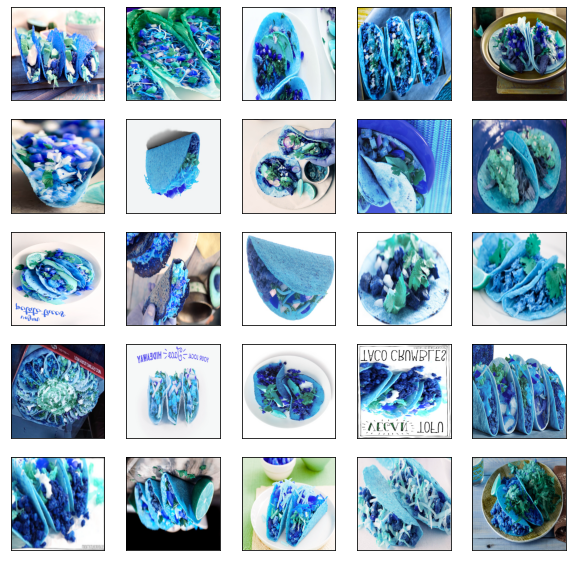

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    Input_image = cv2.imread(train['file'][len(train)-(i+1)])
    Input_image = cv2.resize(Input_image,dsize=(256,256))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Input_image)


### Buildings examples

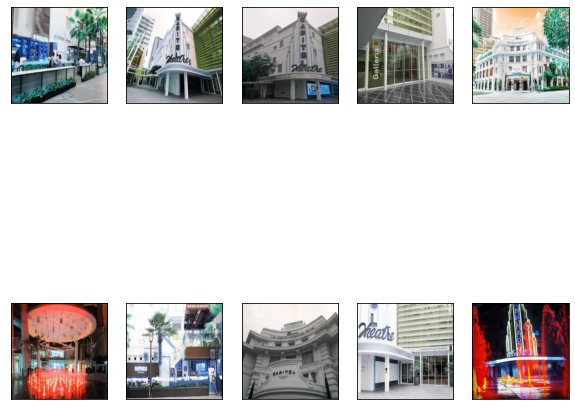

In [26]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    Input_image = cv2.imread(train['file'][(i+1)])
    Input_image = cv2.resize(Input_image,dsize=(256,256))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Input_image)

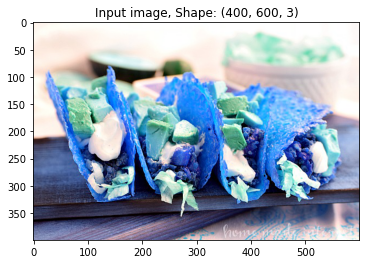

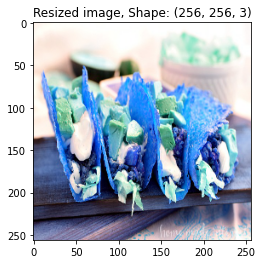

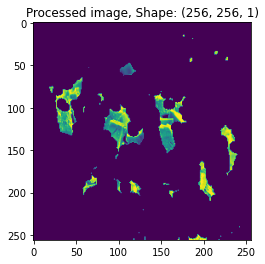

In [15]:
# Input image
Input_image = cv2.imread(train['file'][len(train)-1])

plt.imshow(Input_image)
plt.title('Input image, Shape: '+str(Input_image.shape))
plt.show()

# Resized image
plt.imshow(img)
plt.title('Resized image, Shape: '+str(img.shape))
plt.show()
        
# Processed image to Stack
plt.imshow(np.reshape(img_stack,(256,256)))
plt.title('Processed image, Shape: '+str(img_stack.shape))
plt.show()


#### One-hot Encoding

In [16]:
labels = train['class_num']
labels = to_categorical(labels, num_classes = len(CLASSES))


#### CV-Partition

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, labels, test_size = 0.1, random_state=10)


#### Input Shape

In [18]:
input_shape = x_train[1].shape
print('Input Shape is :', input_shape)


Input Shape is : (256, 256, 4)


## <span style="color:teal">Architecture</span>
---

In [11]:
def fire_incept(x, fire=16, intercept=64):
    x = Conv2D(fire, (5,5), strides=(2,2))(x)
    x = LeakyReLU(alpha=0.15)(x)
    
    left = Conv2D(intercept, (3,3), padding='same')(x)
    left = LeakyReLU(alpha=0.15)(left)
    
    right = Conv2D(intercept, (5,5), padding='same')(x)
    right = LeakyReLU(alpha=0.15)(right)
    
    x = concatenate([left, right], axis=3)
    return x

def fire_squeeze(x, fire=16, intercept=64):
    x = Conv2D(fire, (1,1))(x)
    x = LeakyReLU(alpha=0.15)(x)
    
    left = Conv2D(intercept, (1,1))(x)
    left = LeakyReLU(alpha=0.15)(left)
    
    right = Conv2D(intercept, (3,3), padding='same')(x)
    right = LeakyReLU(alpha=0.15)(right)
    
    x = concatenate([left, right], axis=3)
    return x

image_input=Input(shape=input_shape)

x = fire_incept((image_input), fire=16, intercept=16)

x = fire_incept(x, fire=32, intercept=32)
x = fire_squeeze(x, fire=32, intercept=32)

x = fire_incept(x, fire=64, intercept=64)
x = fire_squeeze(x, fire=64, intercept=64)

x = fire_incept(x, fire=64, intercept=64)
x = fire_squeeze(x, fire=64, intercept=64)

x = Conv2D(64, (3,3))(x)
x = LeakyReLU(alpha=0.1)(x)

x = Flatten()(x)

x = Dense(512)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.1)(x)

out = Dense(len(CLASSES), activation='softmax')(x)

model_new = Model(image_input, out)
model_new.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 126, 16) 1616        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 126, 126, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 126, 126, 16) 2320        leaky_re_lu[0][0]                
______________________________________________________________________________________________

#### Compile the model

In [14]:
model_new.compile(optimizer = Adam(lr=.00025) , loss = 'categorical_crossentropy', metrics=['accuracy'])


### Set a Callbacks

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "Ass_2_model.h5"
checkpoint = ModelCheckpoint(filepath=filepath, mode='max', monitor='val_accuracy', verbose=2, save_best_only=True)

In [20]:
import tensorflow as tf
model_new = tf.keras.models.load_model("Ass_2_Best_Version_3_94.9%_model.h5")

In [21]:
model_new.compile(optimizer = Adam(lr=.00025) , loss = 'categorical_crossentropy', metrics=['accuracy'])


### Data Augumentation

In [22]:
datagen = ImageDataGenerator(rotation_range=40, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.2,
                             horizontal_flip=True, vertical_flip=True)
datagen.fit(x_train)


In [23]:
batch_size = 32
epochs = 10


In [24]:
data = datagen.flow(x_train,y_train, batch_size=batch_size)

### Extensive Traning

In [23]:
#Training
history = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/10
778/778 [==============================] - 395s 484ms/step - loss: 3.9271 - accuracy: 0.0718 - val_loss: 3.3531 - val_accuracy: 0.1474

Epoch 00001: val_accuracy improved from -inf to 0.14740, saving model to Ass_2_model.h5
Epoch 2/10
778/778 [==============================] - 335s 431ms/step - loss: 3.3968 - accuracy: 0.1508 - val_loss: 3.0350 - val_accuracy: 0.2139

Epoch 00002: val_accuracy improved from 0.14740 to 0.21387, saving model to Ass_2_model.h5
Epoch 3/10
778/778 [==============================] - 332s 427ms/step - loss: 3.0486 - accuracy: 0.2123 - val_loss: 2.6089 - val_accuracy: 0.3017

Epoch 00003: val_accuracy improved from 0.21387 to 0.30166, saving model to Ass_2_model.h5
Epoch 4/10
778/778 [==============================] - 323s 415ms/step - loss: 2.7562 - accuracy: 0.2638 - val_loss: 2.5545 - val_accuracy: 0.3259

Epoch 00004: val_accuracy improved from 0.30166 to 0.32587, saving model to Ass_2_model.h5
Epoch 5/10
778/778 [==============================]

In [25]:
#Training
history_2 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/10
778/778 [==============================] - 323s 416ms/step - loss: 1.7849 - accuracy: 0.4878 - val_loss: 1.7099 - val_accuracy: 0.5163

Epoch 00001: val_accuracy did not improve from 0.51770
Epoch 2/10
778/778 [==============================] - 323s 416ms/step - loss: 1.7248 - accuracy: 0.4997 - val_loss: 1.6168 - val_accuracy: 0.5340

Epoch 00002: val_accuracy improved from 0.51770 to 0.53396, saving model to Ass_2_model.h5
Epoch 3/10
778/778 [==============================] - 327s 420ms/step - loss: 1.6690 - accuracy: 0.5141 - val_loss: 1.6106 - val_accuracy: 0.5495

Epoch 00003: val_accuracy improved from 0.53396 to 0.54949, saving model to Ass_2_model.h5
Epoch 4/10
778/778 [==============================] - 326s 419ms/step - loss: 1.6050 - accuracy: 0.5338 - val_loss: 1.4527 - val_accuracy: 0.5704

Epoch 00004: val_accuracy improved from 0.54949 to 0.57045, saving model to Ass_2_model.h5
Epoch 5/10
778/778 [==============================] - 333s 428ms/step - loss: 1.5592

In [26]:
batch_size = 32
epochs = 150


In [27]:
#Training
history_3 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

=========] - 330s 425ms/step - loss: 0.4585 - accuracy: 0.8537 - val_loss: 0.6555 - val_accuracy: 0.8139

Epoch 00056: val_accuracy improved from 0.81069 to 0.81395, saving model to Ass_2_model.h5
Epoch 57/150
778/778 [==============================] - 329s 422ms/step - loss: 0.4626 - accuracy: 0.8495 - val_loss: 0.6523 - val_accuracy: 0.8143

Epoch 00057: val_accuracy improved from 0.81395 to 0.81431, saving model to Ass_2_model.h5
Epoch 58/150
778/778 [==============================] - 324s 416ms/step - loss: 0.4641 - accuracy: 0.8514 - val_loss: 0.6582 - val_accuracy: 0.8096

Epoch 00058: val_accuracy did not improve from 0.81431
Epoch 59/150
778/778 [==============================] - 329s 423ms/step - loss: 0.4654 - accuracy: 0.8472 - val_loss: 0.6419 - val_accuracy: 0.8161

Epoch 00059: val_accuracy improved from 0.81431 to 0.81611, saving model to Ass_2_model.h5
Epoch 60/150
778/778 [==============================] - 326s 419ms/step - loss: 0.4581 - accuracy: 0.8503 - val_loss: 0

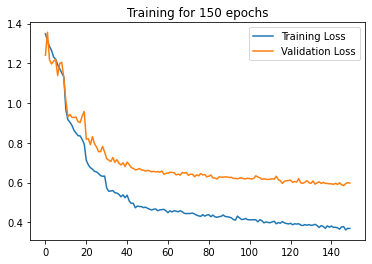

In [31]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Training for ' +str(epochs)+ ' epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


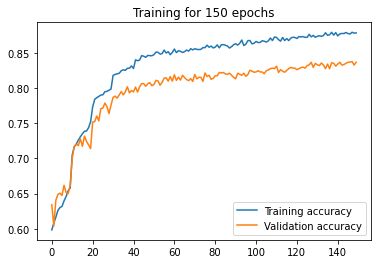

In [34]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Training for ' +str(epochs)+ ' epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()


In [51]:
batch_size = 32
epochs = 10

In [52]:
#Training
history_4 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/10
778/778 [==============================] - 402s 517ms/step - loss: 0.3695 - accuracy: 0.8785 - val_loss: 0.5991 - val_accuracy: 0.8331

Epoch 00001: val_accuracy did not improve from 0.83743
Epoch 2/10
778/778 [==============================] - 342s 440ms/step - loss: 0.3666 - accuracy: 0.8781 - val_loss: 0.5849 - val_accuracy: 0.8371

Epoch 00002: val_accuracy did not improve from 0.83743
Epoch 3/10
778/778 [==============================] - 333s 428ms/step - loss: 0.3636 - accuracy: 0.8789 - val_loss: 0.5979 - val_accuracy: 0.8356

Epoch 00003: val_accuracy did not improve from 0.83743
Epoch 4/10
778/778 [==============================] - 331s 425ms/step - loss: 0.3551 - accuracy: 0.8820 - val_loss: 0.5888 - val_accuracy: 0.8403

Epoch 00004: val_accuracy improved from 0.83743 to 0.84032, saving model to Ass_2_model.h5
Epoch 5/10
778/778 [==============================] - 332s 427ms/step - loss: 0.3654 - accuracy: 0.8804 - val_loss: 0.6020 - val_accuracy: 0.8335

Epoch 000

In [53]:
#Training
history_5 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/10
778/778 [==============================] - 338s 434ms/step - loss: 0.3706 - accuracy: 0.8777 - val_loss: 0.5925 - val_accuracy: 0.8418

Epoch 00001: val_accuracy did not improve from 0.84501
Epoch 2/10
778/778 [==============================] - 342s 440ms/step - loss: 0.3611 - accuracy: 0.8822 - val_loss: 0.5816 - val_accuracy: 0.8389

Epoch 00002: val_accuracy did not improve from 0.84501
Epoch 3/10
778/778 [==============================] - 323s 415ms/step - loss: 0.3566 - accuracy: 0.8813 - val_loss: 0.5853 - val_accuracy: 0.8363

Epoch 00003: val_accuracy did not improve from 0.84501
Epoch 4/10
778/778 [==============================] - 324s 417ms/step - loss: 0.3580 - accuracy: 0.8830 - val_loss: 0.5815 - val_accuracy: 0.8367

Epoch 00004: val_accuracy did not improve from 0.84501
Epoch 5/10
778/778 [==============================] - 325s 417ms/step - loss: 0.3508 - accuracy: 0.8840 - val_loss: 0.5852 - val_accuracy: 0.8385

Epoch 00005: val_accuracy did not improve fro

In [25]:
#Training
epochs = 100
history_6 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

5
Epoch 10/100
778/778 [==============================] - 335s 431ms/step - loss: 0.7969 - accuracy: 0.7502 - val_loss: 0.8383 - val_accuracy: 0.7605

Epoch 00010: val_accuracy improved from 0.75325 to 0.76048, saving model to Ass_2_model.h5
Epoch 11/100
778/778 [==============================] - 322s 413ms/step - loss: 0.8048 - accuracy: 0.7430 - val_loss: 0.8790 - val_accuracy: 0.7410

Epoch 00011: val_accuracy did not improve from 0.76048
Epoch 12/100
778/778 [==============================] - 323s 415ms/step - loss: 0.7811 - accuracy: 0.7556 - val_loss: 0.8582 - val_accuracy: 0.7413

Epoch 00012: val_accuracy did not improve from 0.76048
Epoch 13/100
778/778 [==============================] - 327s 421ms/step - loss: 0.7936 - accuracy: 0.7526 - val_loss: 0.8490 - val_accuracy: 0.7529

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00013: val_accuracy did not improve from 0.76048
Epoch 14/100
778/778 [==============================] - 323s 415m

In [19]:
#Training
epochs = 100
history_7 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/100
778/778 [==============================] - 379s 478ms/step - loss: 0.6113 - accuracy: 0.8054 - val_loss: 0.7322 - val_accuracy: 0.7858

Epoch 00001: val_accuracy improved from -inf to 0.78577, saving model to Ass_2_model.h5
Epoch 2/100
778/778 [==============================] - 340s 437ms/step - loss: 0.6591 - accuracy: 0.7904 - val_loss: 0.7613 - val_accuracy: 0.7818

Epoch 00002: val_accuracy did not improve from 0.78577
Epoch 3/100
778/778 [==============================] - 325s 417ms/step - loss: 0.6562 - accuracy: 0.7929 - val_loss: 0.7825 - val_accuracy: 0.7785

Epoch 00003: val_accuracy did not improve from 0.78577
Epoch 4/100
778/778 [==============================] - 319s 409ms/step - loss: 0.6554 - accuracy: 0.7892 - val_loss: 0.7664 - val_accuracy: 0.7861

Epoch 00004: val_accuracy improved from 0.78577 to 0.78613, saving model to Ass_2_model.h5
Epoch 5/100
778/778 [==============================] - 328s 422ms/step - loss: 0.6664 - accuracy: 0.7897 - val_loss: 0.

KeyboardInterrupt: 

In [18]:
#Training
epochs = 120
history_8 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

 - val_accuracy: 0.8934

Epoch 00026: val_accuracy did not improve from 0.89379
Epoch 27/120
778/778 [==============================] - 322s 414ms/step - loss: 0.1890 - accuracy: 0.9348 - val_loss: 0.4639 - val_accuracy: 0.8923

Epoch 00027: val_accuracy did not improve from 0.89379
Epoch 28/120
778/778 [==============================] - 322s 413ms/step - loss: 0.1836 - accuracy: 0.9392 - val_loss: 0.4753 - val_accuracy: 0.8931

Epoch 00028: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00028: val_accuracy did not improve from 0.89379
Epoch 29/120
778/778 [==============================] - 322s 414ms/step - loss: 0.1700 - accuracy: 0.9427 - val_loss: 0.4593 - val_accuracy: 0.8941

Epoch 00029: val_accuracy improved from 0.89379 to 0.89415, saving model to Ass_2_model.h5
Epoch 30/120
778/778 [==============================] - 321s 412ms/step - loss: 0.1662 - accuracy: 0.9457 - val_loss: 0.4582 - val_accuracy: 0.9007

Epoch 00030: val_accuracy improved from 0

In [22]:
#Training
epochs = 150
history_9 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

ot improve from 0.94617
Epoch 21/150
778/778 [==============================] - 323s 415ms/step - loss: 0.2130 - accuracy: 0.9302 - val_loss: 0.1888 - val_accuracy: 0.9375

Epoch 00021: val_accuracy did not improve from 0.94617
Epoch 22/150
778/778 [==============================] - 323s 415ms/step - loss: 0.2144 - accuracy: 0.9285 - val_loss: 0.1934 - val_accuracy: 0.9400

Epoch 00022: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00022: val_accuracy did not improve from 0.94617
Epoch 23/150
778/778 [==============================] - 324s 416ms/step - loss: 0.1830 - accuracy: 0.9393 - val_loss: 0.1723 - val_accuracy: 0.9426

Epoch 00023: val_accuracy did not improve from 0.94617
Epoch 24/150
778/778 [==============================] - 323s 415ms/step - loss: 0.1750 - accuracy: 0.9418 - val_loss: 0.1547 - val_accuracy: 0.9483

Epoch 00024: val_accuracy improved from 0.94617 to 0.94834, saving model to Ass_2_model.h5
Epoch 25/150
778/778 [=====================

KeyboardInterrupt: 

In [71]:
#Training
epochs = 30
history_10 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/30
778/778 [==============================] - 337s 428ms/step - loss: 0.8872 - accuracy: 0.7816 - val_loss: 0.5358 - val_accuracy: 0.8320

Epoch 00001: val_accuracy improved from -inf to 0.83201, saving model to Ass_2_model.h5
Epoch 2/30
778/778 [==============================] - 334s 425ms/step - loss: 0.6300 - accuracy: 0.8038 - val_loss: 0.4829 - val_accuracy: 0.8537

Epoch 00002: val_accuracy improved from 0.83201 to 0.85368, saving model to Ass_2_model.h5
Epoch 3/30
778/778 [==============================] - 325s 418ms/step - loss: 0.6033 - accuracy: 0.8112 - val_loss: 0.6263 - val_accuracy: 0.8056

Epoch 00003: val_accuracy did not improve from 0.85368
Epoch 4/30
778/778 [==============================] - 323s 415ms/step - loss: 0.6057 - accuracy: 0.8065 - val_loss: 0.4859 - val_accuracy: 0.8551

Epoch 00004: val_accuracy improved from 0.85368 to 0.85513, saving model to Ass_2_model.h5
Epoch 5/30
778/778 [==============================] - 324s 417ms/step - loss: 0.5849 - 

KeyboardInterrupt: 

In [27]:
#Training
epochs = 40
history_11 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/40
778/778 [==============================] - 390s 475ms/step - loss: 0.4798 - accuracy: 0.8505 - val_loss: 0.4346 - val_accuracy: 0.8786

Epoch 00001: val_accuracy improved from -inf to 0.87861, saving model to Ass_2_model.h5
Epoch 2/40
778/778 [==============================] - 345s 443ms/step - loss: 0.4999 - accuracy: 0.8391 - val_loss: 0.4461 - val_accuracy: 0.8674

Epoch 00002: val_accuracy did not improve from 0.87861
Epoch 3/40
778/778 [==============================] - 348s 447ms/step - loss: 0.5269 - accuracy: 0.8334 - val_loss: 0.4404 - val_accuracy: 0.8652

Epoch 00003: val_accuracy did not improve from 0.87861
Epoch 4/40
778/778 [==============================] - 354s 455ms/step - loss: 0.5237 - accuracy: 0.8327 - val_loss: 0.5689 - val_accuracy: 0.8349

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00004: val_accuracy did not improve from 0.87861
Epoch 5/40
778/778 [==============================] - 335s 430ms/step - loss: 

In [33]:
#Training
epochs = 40
history_12 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

Epoch 1/40
778/778 [==============================] - 338s 432ms/step - loss: 0.4307 - accuracy: 0.8668 - val_loss: 0.5191 - val_accuracy: 0.8533

Epoch 00001: val_accuracy did not improve from 0.94256
Epoch 2/40
778/778 [==============================] - 341s 439ms/step - loss: 0.4627 - accuracy: 0.8542 - val_loss: 0.4627 - val_accuracy: 0.8663

Epoch 00002: val_accuracy did not improve from 0.94256
Epoch 3/40
778/778 [==============================] - 331s 426ms/step - loss: 0.4679 - accuracy: 0.8505 - val_loss: 0.4836 - val_accuracy: 0.8649

Epoch 00003: val_accuracy did not improve from 0.94256
Epoch 4/40
778/778 [==============================] - 333s 428ms/step - loss: 0.4681 - accuracy: 0.8483 - val_loss: 0.5576 - val_accuracy: 0.8403

Epoch 00004: val_accuracy did not improve from 0.94256
Epoch 5/40
778/778 [==============================] - 331s 425ms/step - loss: 0.4696 - accuracy: 0.8504 - val_loss: 0.4835 - val_accuracy: 0.8595

Epoch 00005: ReduceLROnPlateau reducing learn

KeyboardInterrupt: 

In [25]:
#Training
epochs = 150
history_13 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

ove from 0.94545
Epoch 54/150
778/778 [==============================] - 318s 408ms/step - loss: 0.1016 - accuracy: 0.9654 - val_loss: 0.2441 - val_accuracy: 0.9451

Epoch 00054: val_accuracy did not improve from 0.94545
Epoch 55/150
778/778 [==============================] - 315s 405ms/step - loss: 0.0953 - accuracy: 0.9704 - val_loss: 0.2464 - val_accuracy: 0.9429

Epoch 00055: val_accuracy did not improve from 0.94545
Epoch 56/150
778/778 [==============================] - 325s 418ms/step - loss: 0.1008 - accuracy: 0.9672 - val_loss: 0.2565 - val_accuracy: 0.9408

Epoch 00056: val_accuracy did not improve from 0.94545
Epoch 57/150
778/778 [==============================] - 319s 411ms/step - loss: 0.0964 - accuracy: 0.9695 - val_loss: 0.2510 - val_accuracy: 0.9429

Epoch 00057: val_accuracy did not improve from 0.94545
Epoch 58/150
778/778 [==============================] - 316s 406ms/step - loss: 0.1025 - accuracy: 0.9664 - val_loss: 0.2488 - val_accuracy: 0.9426

Epoch 00058: val_a

In [25]:
#Training
epochs = 150
history_14 = model_new.fit(data, epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction,checkpoint])

============================] - 322s 414ms/step - loss: 0.0926 - accuracy: 0.9683 - val_loss: 0.2564 - val_accuracy: 0.9382

Epoch 00031: val_accuracy did not improve from 0.94545
Epoch 32/150
778/778 [==============================] - 321s 413ms/step - loss: 0.0919 - accuracy: 0.9701 - val_loss: 0.2628 - val_accuracy: 0.9386

Epoch 00032: val_accuracy did not improve from 0.94545
Epoch 33/150
778/778 [==============================] - 324s 417ms/step - loss: 0.0962 - accuracy: 0.9682 - val_loss: 0.2561 - val_accuracy: 0.9386

Epoch 00033: val_accuracy did not improve from 0.94545
Epoch 34/150
778/778 [==============================] - 324s 416ms/step - loss: 0.0899 - accuracy: 0.9692 - val_loss: 0.2613 - val_accuracy: 0.9397

Epoch 00034: val_accuracy did not improve from 0.94545
Epoch 35/150
778/778 [==============================] - 323s 415ms/step - loss: 0.0935 - accuracy: 0.9701 - val_loss: 0.2628 - val_accuracy: 0.9404

Epoch 00035: val_accuracy did not improve from 0.94545
Epoc

KeyboardInterrupt: 

In [26]:
from tensorflow.keras.models import load_model
new_model = load_model("Ass_2_Best_Version_3_94.9%_model.h5")

In [25]:
score = model_new.evaluate(x_val,y_val)
print('Accuracy on Validation Set',score[1])

87/87 [==============================] - 15s 50ms/step - loss: 0.2515 - accuracy: 0.9511
Accuracy on Validation Set 0.948699414730072


***
## <span style="color:teal">Applying Suppot Vector Machine</span>
***

#### Extracting Features from last Layer

In [26]:
model_feat = Model(inputs=model_new.input,outputs=model_new.get_layer('dense_1').output)

feat_train = model_feat.predict(x_train)
print(feat_train.shape)

feat_val = model_feat.predict(x_val)
print(feat_val.shape)

# feat_test = model_feat.predict(x_test)
# print(feat_test.shape)


(24903, 72)
(2768, 72)


#### Applying SVM

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

fitting done !!!


#### Prediction Score **Training Features**

In [28]:
svm.score(feat_train,np.argmax(y_train,axis=1))


0.9966269124201903

#### Prediction Score *Validation Features*

In [29]:
svm.score(feat_val,np.argmax(y_val,axis=1))


0.9490606936416185

***
## <span style="color:teal">Applying XGBOOST</span>
***

In [30]:
import xgboost as xgb

xb = xgb.XGBClassifier()

xb.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')


[10:05:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fitting done !!!


#### Prediction Score **Training Features**

In [31]:
xb.score(feat_train,np.argmax(y_train,axis=1))


0.9994779745412199

#### Prediction Score **Validation Features**

In [32]:
xb.predict(feat_val)

array([67, 52, 19, ..., 21, 13, 29], dtype=int64)

In [33]:
xb.score(feat_val,np.argmax(y_val,axis=1))



0.9476156069364162

***
### <span style="color:teal">Difference in prediction using XGB and SVM on final layer of CNN and just CNN is either samll or worse, so lets stay with our trained CNN model</span>
***

## See results on testing images

In [34]:
test_dir = r'test_fn_updated\test_images'
os.listdir(test_dir)

['a_0.jpg', 'b_21.jpg', 'c_7.JPG', 'd_4.jpg', 'e_22.jpg']

In [35]:
test_dir = 'test_fn_updated/test_images'
scores = np.zeros([1, 72])
for image in os.listdir(test_dir):
# Pipeline to pre-process the image
    img = cv2.imread(test_dir + "/" + image) 
    img = cv2.resize(img,dsize=(256,256))
    img_stack = segment_image(img)
    img_stack = sharpen_image(img_stack)
    img_stack = cv2.cvtColor( img_stack, cv2.COLOR_RGB2GRAY )
    img_stack = np.reshape(img_stack,(256,256,1))
    img_test = np.concatenate((np.array(img),np.array(img_stack)),axis=2)
    img_test = np.reshape(img_test, (1, 256, 256, 4))
    index = np.argmax(model_new.predict(img_test))
    clases_to_predict = train["_class"].unique().tolist()
    print("Predicted class name:",clases_to_predict[index])
    scores[0] = model_new.predict(img_test)

    print(np.argmax(scores))
    print(scores[0].argsort()[-5:][::-1])

Predicted class name: stir_fried_pork
67
[67  3 63 23 30]
Predicted class name: cafe_coffee_with_milk
21
[21 32 47 38 41]
Predicted class name: 1_cemetry
7
[ 7  4  8  1 12]
Predicted class name: 1_scis
12
[12 49  1  4  0]
Predicted class name: chasoba
22
[22 68 63 47 67]


***
#### <span style="color:teal">The first image wich is example of wrongly classified cofee shope in Capitol classified uncorrectly all others are top_1</span>
***

### Full test set is closed and unavaliable but the feedback was given that for all clases the model performs with top_5 accuracy is 90-95%. While top_1 is around 85%. Thats good results having in mind that both traning data and test set have wrongly classified images.

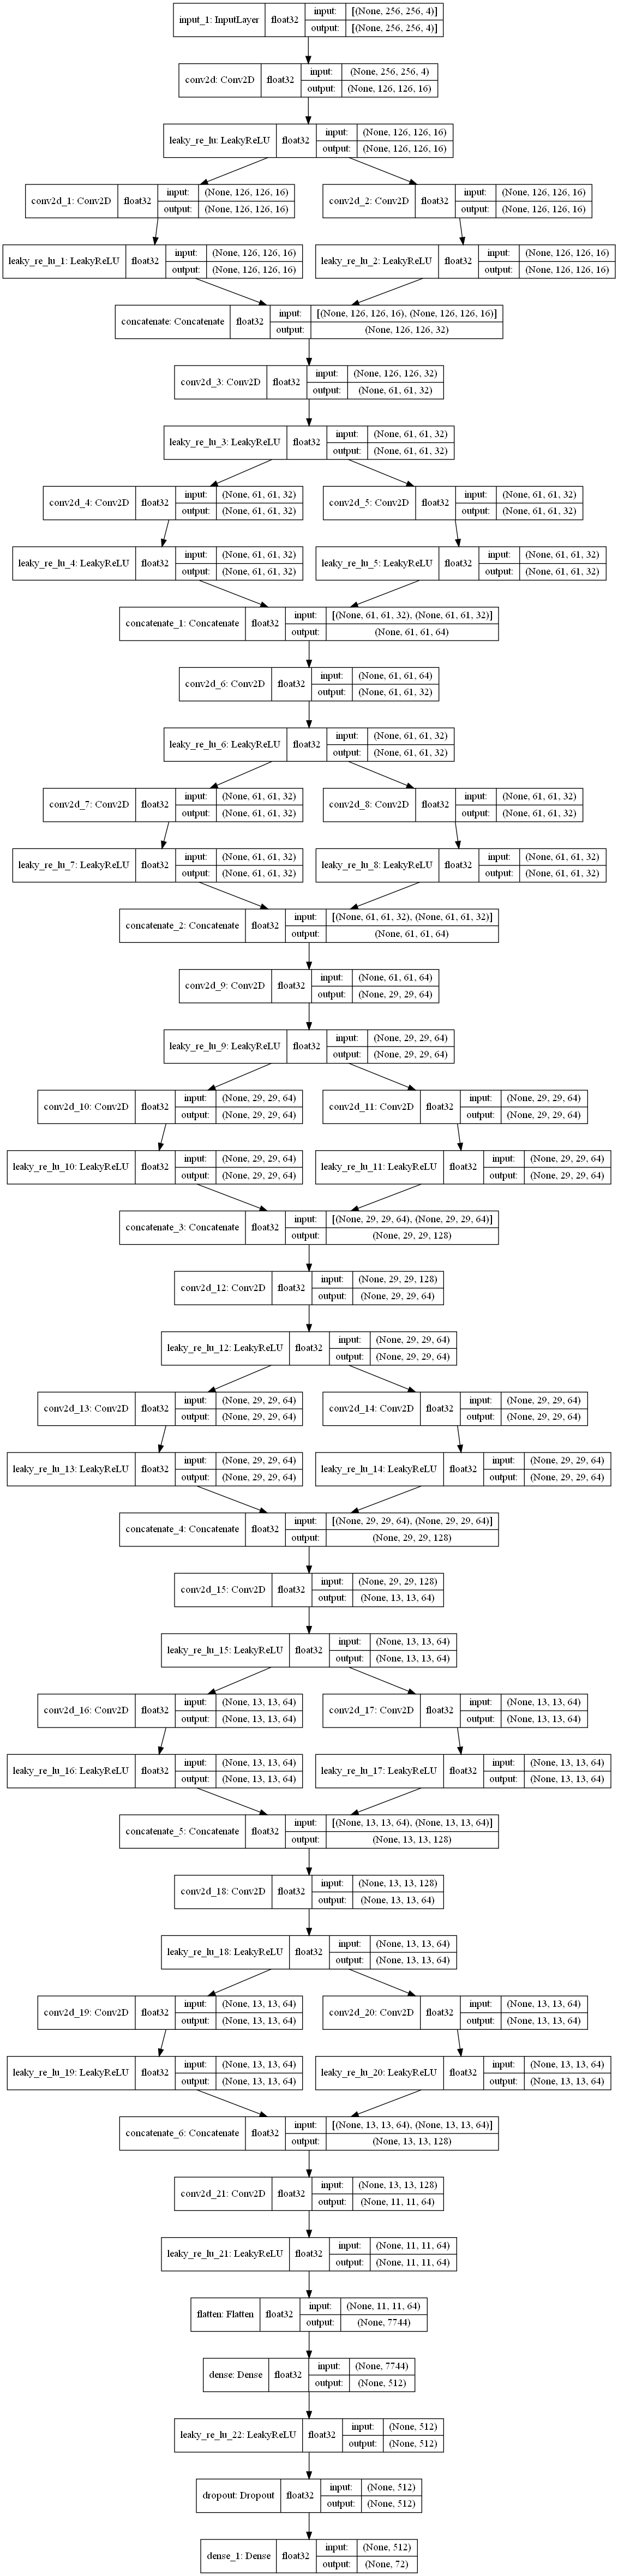

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)